<a href="https://colab.research.google.com/github/egipot/Python_simple_projects/blob/main/FCC_LLM_1_bigram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#open a sample book and check the length
with open ('cinderella.txt', 'r', encoding = 'utf-8') as f:
    text = f.read()

print(len(text))

123730


In [ ]:
#print the first 200chars of the book:
print(text[:200])

﻿The Project Gutenberg eBook of Cinderella; Or, The Little Glass Slipper, and Other Stories
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at 


In [ ]:
#create a list of characters used in the text file, as if a vocabulary list (for later use)
chars = sorted(set(text))
print(chars)

['\n', ' ', '!', '"', '#', '$', '%', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '—', '‘', '’', '“', '”', '•', '™', '\ufeff']


In [ ]:
#count the number of character types in the entire book
print(len(chars))

89


In [ ]:
#use a tokenizer (encoder and decoder to convert each character or element of the chars array to an integer)
string_to_int = {ch:i for i, ch in enumerate(chars)}
int_to_string = {i:ch for i, ch in enumerate(chars)}
encode = lambda s: [string_to_int[c] for c in s]
decode = lambda l: ''.join([int_to_string[i] for i in l])

#tokenize a sample text, for example, 'hello'
print(encode('hello'))

[62, 59, 66, 66, 69]


In [ ]:
#decode hello
decode([62, 59, 66, 66, 69])

'hello'

In [ ]:
#use a machine learning framework "PyTorch"
#PyTorch is an optimized tensor library for deep learning using GPUs and CPUs.
#https://pytorch.org/docs/stable/index.html
#this module supports math, calculus, linear algebra operations using tensors as the type of data

import torch

In [ ]:
#store the whole text into a tensor element

data = torch.tensor(encode(text), dtype = torch.long)

In [ ]:
#as a sample, print the first 100 integers of the data
print(data[:100])

tensor([88, 47, 62, 59,  1, 43, 72, 69, 64, 59, 57, 74,  1, 34, 75, 74, 59, 68,
        56, 59, 72, 61,  1, 59, 29, 69, 69, 65,  1, 69, 60,  1, 30, 63, 68, 58,
        59, 72, 59, 66, 66, 55, 26,  1, 42, 72, 11,  1, 47, 62, 59,  1, 39, 63,
        74, 74, 66, 59,  1, 34, 66, 55, 73, 73,  1, 46, 66, 63, 70, 70, 59, 72,
        11,  1, 55, 68, 58,  1, 42, 74, 62, 59, 72,  1, 46, 74, 69, 72, 63, 59,
        73,  0,  1,  1,  1,  1,  0, 47, 62, 63])


In [ ]:
#separate data using 80:20 train vs validation ratio

n = int(0.8*len(data))
train_data = data[:n]
val_data = data[n:]

In [ ]:
#inputs and targets

block_size = 8

x = train_data[:block_size]
y = train_data[1:block_size + 1]

for t in range (block_size):
    context = x[:t+1]
    target = y[t]
    print('when the input is', context, 'target is', target)

when the input is tensor([88]) target is tensor(47)
when the input is tensor([88, 47]) target is tensor(62)
when the input is tensor([88, 47, 62]) target is tensor(59)
when the input is tensor([88, 47, 62, 59]) target is tensor(1)
when the input is tensor([88, 47, 62, 59,  1]) target is tensor(43)
when the input is tensor([88, 47, 62, 59,  1, 43]) target is tensor(72)
when the input is tensor([88, 47, 62, 59,  1, 43, 72]) target is tensor(69)
when the input is tensor([88, 47, 62, 59,  1, 43, 72, 69]) target is tensor(64)


In [ ]:
#import torch - already imported above (line 7)

device = 'cuda'  if torch.cuda.is_available() else 'cpu'
print(device)

cpu


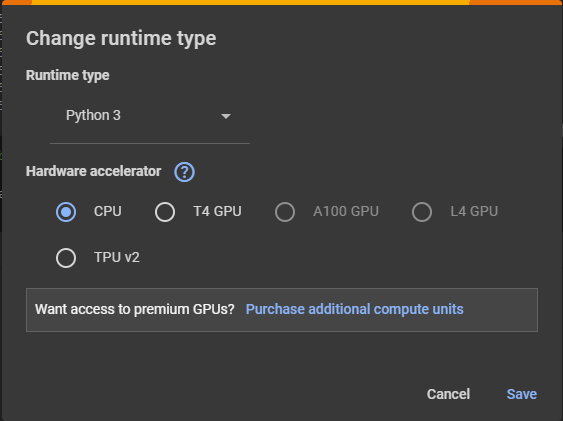

changed runtime type to T4

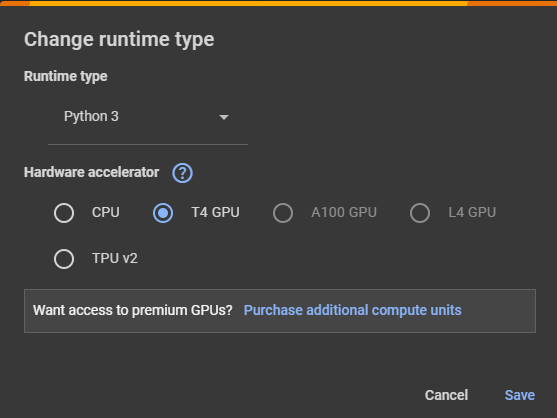

In [ ]:
#importing again due to changed runtime type
import torch

device = 'cuda'  if torch.cuda.is_available() else 'cpu'
print(device)

cuda
